<a href="https://colab.research.google.com/github/Ajinthan1998/Colab01/blob/main/colab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls /bin

'['				      mpic++
 7z				      mpicc
 7za				      mpiCC
 7zr				      mpicc.openmpi
 aclocal			      mpiCC.openmpi
 aclocal-1.16			      mpic++.openmpi
 acyclic			      mpicxx
 add-apt-repository		      mpicxx.openmpi
 addpart			      mpiexec
 addr2line			      mpiexec.openmpi
 aggregate_profile		      mpif77
 apropos			      mpif77.openmpi
 apt				      mpif90
 apt-add-repository		      mpif90.openmpi
 apt-cache			      mpifort
 apt-cdrom			      mpifort.openmpi
 apt-config			      mpijavac
 apt-extracttemplates		      mpijavac.pl
 apt-ftparchive			      mpirun
 apt-get			      mpirun.openmpi
 apt-key			      mv
 apt-mark			      mysql_config
 apt-sortpkgs			      namei
 ar				      nawk
 arch				      nc-config
 as				      ncurses5-config
 asan_symbolize			      ncurses6-config
 asan_symbolize-14		      ncursesw5-config
 autoconf			      ncursesw6-config
 autoheader			      neato
 autom4te			      neqn
 automake			      networkctl
 automake-1.16			      newgrp
 autoreconf			     

In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/Ajinthan1998/Colab01

Cloning into 'Colab01'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!cd sample_data/

In [ ]:
!date

Tue Jan  9 03:49:50 PM UTC 2024


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from google.colab import drive #connect to google drive
drive.mount('/content/gdrive')
from sklearn.model_selection import train_test_split

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/My Drive/potato",
    shuffle = True, #randomly shuffle and load them
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2162 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

#68*32 = 2176

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)>>


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[153. 145. 156.]
  [152. 144. 155.]
  [152. 144. 155.]
  ...
  [161. 156. 163.]
  [164. 159. 166.]
  [167. 162. 169.]]

 [[153. 145. 156.]
  [152. 144. 155.]
  [152. 144. 155.]
  ...
  [153. 148. 155.]
  [154. 149. 156.]
  [156. 151. 158.]]

 [[153. 145. 156.]
  [153. 145. 156.]
  [153. 145. 156.]
  ...
  [150. 145. 152.]
  [150. 145. 152.]
  [150. 145. 152.]]

 ...

 [[145. 134. 148.]
  [145. 134. 148.]
  [145. 134. 148.]
  ...
  [148. 138. 149.]
  [145. 135. 146.]
  [144. 134. 145.]]

 [[145. 134. 148.]
  [145. 134. 148.]
  [145. 134. 148.]
  ...
  [145. 135. 146.]
  [142. 132. 143.]
  [141. 131. 142.]]

 [[146. 135. 149.]
  [145. 134. 148.]
  [144. 133. 147.]
  ...
  [148. 138. 149.]
  [146. 136. 147.]
  [145. 135. 146.]]], shape=(256, 256, 3), dtype=float32)


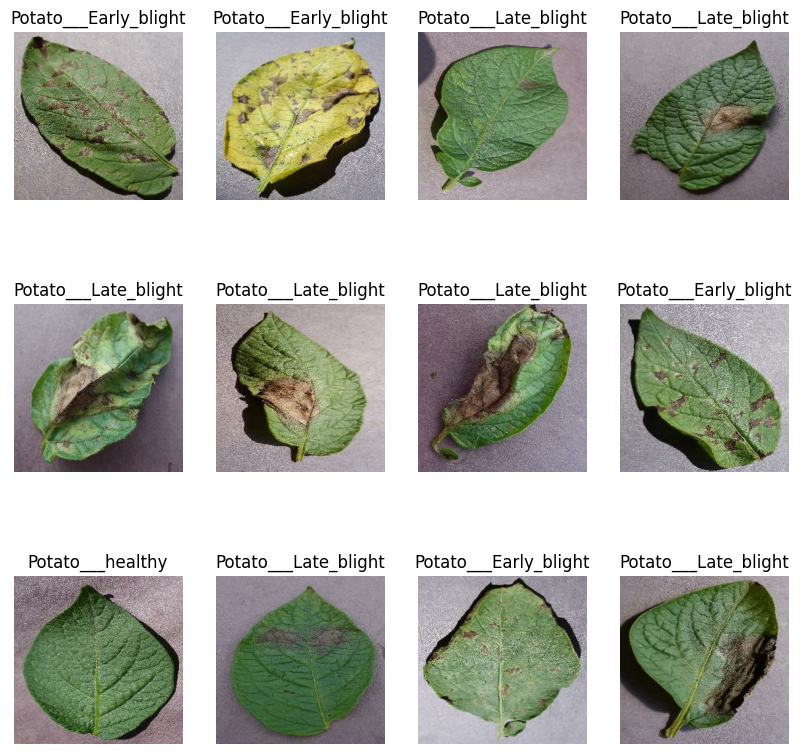

In [ ]:
plt.figure(figsize=(10,10)) #set image size
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1) #show all (12) the images
    plt.imshow(image_batch[i].numpy().astype("uint8")) #because of it float so using '.astype("uint8")' to covert to int.
    plt.title(class_names[label_batch[i]]) #show it's labes name
    plt.axis("off") #not showing axis


80% ==> training ,
20% ==> 10% validation, 10% test
# validatation used during training process, once we done each epochs then we do 10% test dataset


In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
#validation size is 10% so 0.1
val_size = 0.1
#actual val dataset size
len(dataset)*val_size

6.800000000000001

6 sample basically

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size) #skip size to val size
  test_ds = ds.skip(train_size).take(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

6

In [ ]:
len(val_ds)

6

In [ ]:
#cache ,read the images from disk then keep that in the memory
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255) #if we have datas with size of 255 but predicted datas also conert to size=255.
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), #just created preprocessing some layers.
    layers.experimental.preprocessing.RandomRotation(0.2), #using augmentation to 1 image to increase more images Ex 1 to 5.
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), #normalize the probability of the clzes
])

model.build(input_shape=input_shape) #just an API

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #define loss Fn
    metrics = ['accuracy']
)

In [ ]:
histoary = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1, #print just lot of outs
    validation_data = val_ds #each epochs help to track the accuracy
)

Epoch 1/50
54/54 [==============================] - 272s 121ms/step - loss: 0.9168 - accuracy: 0.4693 - val_loss: 0.8749 - val_accuracy: 0.4427
Epoch 2/50
54/54 [==============================] - 3s 64ms/step - loss: 0.7862 - accuracy: 0.6047 - val_loss: 0.5466 - val_accuracy: 0.7760
Epoch 3/50
54/54 [==============================] - 3s 62ms/step - loss: 0.5666 - accuracy: 0.7494 - val_loss: 0.4542 - val_accuracy: 0.8073
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.4177 - accuracy: 0.8252 - val_loss: 0.9237 - val_accuracy: 0.6615
Epoch 5/50
54/54 [==============================] - 4s 64ms/step - loss: 0.3466 - accuracy: 0.8582 - val_loss: 0.4418 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3059 - accuracy: 0.8698 - val_loss: 0.2530 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2267 - accuracy: 0.9138 - val_loss: 0.1299 - val_accuracy: 0.9479
Epoch 8/50

In [ ]:
scores = model.evaluate(test_ds)
scores

6/6 [==============================] - 3s 28ms/step - loss: 0.0688 - accuracy: 0.9844


[0.06876781582832336, 0.984375]

In [ ]:
history

!ls /bin
!pwd
!git clone https://github.com/Ajinthan1998/Colab01
!cd sample_data/
!date
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from google.colab import drive #connect to google drive
drive.mount('/content/gdrive')
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/My Drive/potato",
    shuffle = True, #randomly shuffle and load them
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
class_names = dataset.class_names
class_names
len(dataset)
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])
plt.figure(figsize=(10,10)) #set image size
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1) #show a